# **1. Introdução**

O objetivo deste notebook é apresentar como foi realizada a coleta dos dados (quais as origens), quais foram as etapas para o processamento dos dados, apresentação da análise exploratória e a criação de uma base de dados final que será utilizada no treinamento de um modelo de NLP (Natural Language Processing).


**Observação**: O treinamento do modelo está no notebook train_model.

# **2. Coleta de Dados**

Os dados coletados para realizar a análise e treinamento do modelo deste projeto foram capturados dos seguintes locais:

* https://github.com/pauloemmilio/dataset

* https://www.kaggle.com/leandrodoze/tweets-from-mgbr

# **3. Processamento/Tratamento de Dados**

A seguir serão apresentadas as etapas do pré-processamento dos dados:

* Primeiramente, é necessário remover as colunas que não serão utilizadas no projeto.
* Verificar e eliminar dados nulos ou ausentes.
* União dos DataFrames "TAS" e "MG".
* Criação de uma base de dados final para o treinamento posterior.

### **3.1. Importando bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import re
import unicodedata

### **3.2. Criação dos DataFrames**

In [ ]:
prefix_path = '/home/lucas/sentiment-analysis/'

In [ ]:
dataset_tas = pd.read_csv(prefix_path + "datasets/Tweets_TAS.txt", encoding='utf-8')
dataset_mg = pd.read_csv(prefix_path + "datasets/Tweets_Mg.csv", encoding='utf-8')

**Analisando o conjunto de dados "dataset_tas"**

In [48]:
dataset_tas.head()

,Unnamed: 0,Tweet,Sentimento
0,0,"WildCat, o robot de quatro patas que corre a 2...",Neutral
1,1,Parem de olhar para o meu telemovel quando est...,Positive
2,2,@scrismelo Porque ainda não acordaste?!,Neutral
3,3,@TejoPaulo boa opção!,Neutral
4,4,RT @joaomhenrique: O corte nas pensões de sobr...,Neutral


In [49]:
dataset_tas.drop('Unnamed: 0', axis=1, inplace=True)

In [50]:
dataset_tas.isna().sum()

Tweet          1
Sentimento    13
dtype: int64

É possível verificar que existem dados nulos ou ausentes. Para isso, vamos executar o comando abaixo e na sequência vamos reinicializar os valores dos indexes que foram excluídos para evitar problemas.

In [51]:
dataset_tas.dropna(inplace=True)
dataset_tas.reset_index(drop=True, inplace=True)

print("Verificando se ainda existem dados nulos ou ausentes:\n")
print(dataset_tas.isna().sum())

Verificando se ainda existem dados nulos ou ausentes:

Tweet         0
Sentimento    0
dtype: int64


In [52]:
dataset_tas.head()

,Tweet,Sentimento
0,"WildCat, o robot de quatro patas que corre a 2...",Neutral
1,Parem de olhar para o meu telemovel quando est...,Positive
2,@scrismelo Porque ainda não acordaste?!,Neutral
3,@TejoPaulo boa opção!,Neutral
4,RT @joaomhenrique: O corte nas pensões de sobr...,Neutral


In [53]:
dataset_tas['Sentimento'].replace(to_replace=['Neutral'], value='Neutro', inplace=True)
dataset_tas['Sentimento'].replace(to_replace=['Positive'], value='Positivo', inplace=True)
dataset_tas['Sentimento'].replace(to_replace=['Negative'], value='Negativo', inplace=True)

**Analisando o conjunto de dados "dataset_mg"**

In [54]:
dataset_mg.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [55]:
list_column_drop = ['Unnamed: 0', 'Created At', 'Geo Coordinates.latitude',
                   'Geo Coordinates.longitude', 'User Location', 'Username',
                   'User Screen Name', 'Retweet Count', 'Observação',
                   'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
                   'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                   'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                   'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24']

In [56]:
dataset_mg.drop(list_column_drop, axis=1, inplace=True)

In [57]:
dataset_mg.head()

,Text,Classificacao
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro
1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro
2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro
3,��� https://t.co/BnDsO34qK0,Neutro
4,��� PSOL vai questionar aumento de vereadores ...,Negativo


In [58]:
print("Verificando se ainda existem dados nulos ou ausentes:\n")
print(dataset_mg.isnull().sum())

Verificando se ainda existem dados nulos ou ausentes:

Text             0
Classificacao    0
dtype: int64


#### **Renomeando as colunas dos DataFrames TAS e MG que serão utilizadas**

In [59]:
dataset_tas.columns = ['text', 'labels']
dataset_mg.columns = ['text', 'labels']

In [60]:
dataset_tas.head()

,text,labels
0,"WildCat, o robot de quatro patas que corre a 2...",Neutro
1,Parem de olhar para o meu telemovel quando est...,Positivo
2,@scrismelo Porque ainda não acordaste?!,Neutro
3,@TejoPaulo boa opção!,Neutro
4,RT @joaomhenrique: O corte nas pensões de sobr...,Neutro


In [61]:
dataset_mg.head()

,text,labels
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro
1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro
2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro
3,��� https://t.co/BnDsO34qK0,Neutro
4,��� PSOL vai questionar aumento de vereadores ...,Negativo


In [64]:
print("Dataset TAS: Informações:")
print(dataset_tas.info())

print("\nDataset MG: Informações:")
print(dataset_mg.info())

Dataset TAS: Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60257 entries, 0 to 60256
Data columns (total 2 columns):
text      60257 non-null object
labels    60257 non-null object
dtypes: object(2)
memory usage: 941.6+ KB
None

Dataset MG: Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 2 columns):
text      8199 non-null object
labels    8199 non-null object
dtypes: object(2)
memory usage: 128.2+ KB
None


É possível observar que temos um total de:
* **60.270 tweets** em nosso dataset TAS; e 
* **8.199 tweets** em nosso dataset MG.

**Concatenando os DataFrames "dataset_tas" e "dataset_mg"**

In [62]:
concat_df = (pd.concat([dataset_tas, dataset_mg], axis=0, ignore_index=True)).reset_index(drop=True)

**Exportando o DataFrame concatenado**

In [21]:
concat_df.to_csv(prefix_path + 'datasets/dataset_concat.csv', header=True, index=False, sep=';', encoding='utf-8')

# **4. Análise Exploratória dos Dados (EDA)**

* Verificando 5 registros aleatórios dos datasets.
* Criação de gráficos de barra e de pizza para a análise dos datasets.
* Analisando alguns dados "brutos" dos datasets.

In [65]:
dataset_tas.sample(5)

,text,labels
45049,Governo dos Açores satisfeito com prolongame​n...,Negativo
18439,As pessoas dizem-me que tenho muita pinta @Bin...,Neutro
55951,@almaradona Estavam a dar a sua opinião de esp...,Positivo
21947,RT @claudiasplemos: dramas para ir para o banh...,Negativo
21518,RT @JadsonN_andre: Deus é fiel 🙏,Negativo


In [66]:
dataset_mg.sample(5)

,text,labels
3261,"RT @exame: Em calamidade financeira, governo d...",Negativo
5116,⭕rzil News\n\n�� Governo de Minas Gerais regul...,Positivo
8021,PM prende rapaz por vadiagem e uso de drogas n...,Positivo
3150,"RT @Estadao: Em calamidade financeira, MG comp...",Negativo
1421,"I'm at Giorgio Gastrô in Governador Valadares,...",Neutro


In [67]:
dataset_tas.columns

Index(['text', 'labels'], dtype='object')

#### **4.1. Criando gráficos de barras para apresentar o número de ocorrências para cada classe nos DataFrames TAS e MG**

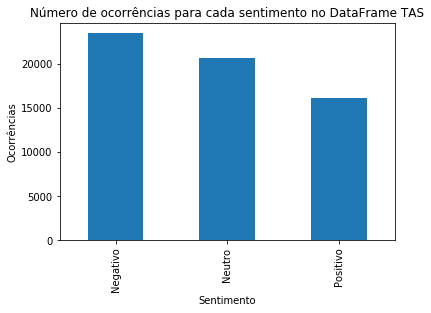

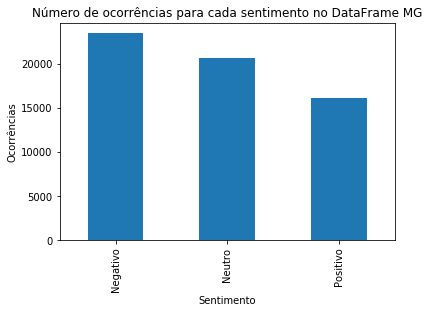

In [94]:
series_tas = dataset_tas['labels'].value_counts()
series_mg = dataset_mg['labels'].value_counts()


plot1 = plt.figure(1)
series_tas = dataset_tas['labels'].value_counts()
ax = series.plot(kind='bar', title='Número de ocorrências para cada sentimento no DataFrame TAS')
ax.set_xlabel('Sentimento')
ax.set_ylabel('Ocorrências')
plt.plot()


plot2 = plt.figure(2)
series_mg = dataset_mg['labels'].value_counts()
ax = series.plot(kind='bar', title='Número de ocorrências para cada sentimento no DataFrame MG')
ax.set_xlabel('Sentimento')
ax.set_ylabel('Ocorrências')

plt.show()

#### **4.2. Criando gráficos de pizza para apresentar o percentual de ocorrências para cada classe nos DataFrames TAS e MG**

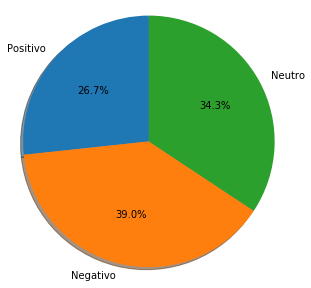

In [97]:
# Declarando uma figura com tamanho customizado 
fig = plt.figure(figsize=(5, 5))

# labels para três classes
labels = 'Positivo', 'Negativo', 'Neutro'

# Sizes for each slide
sizes = [((dataset_tas['labels']=='Positivo')==True).sum(), ((dataset_tas['labels']=='Negativo')==True).sum(),
        ((dataset_tas['labels']=='Neutro')==True).sum()]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

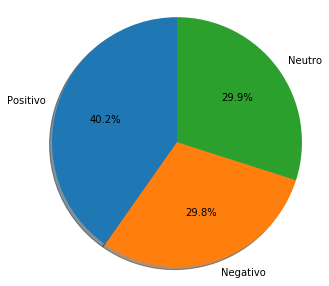

In [98]:
# Declarando uma figura com tamanho customizado 
fig = plt.figure(figsize=(5, 5))

# labels para três classes
labels = 'Positivo', 'Negativo', 'Neutro'

# Sizes for each slide
sizes = [((dataset_mg['labels']=='Positivo')==True).sum(), ((dataset_mg['labels']=='Negativo')==True).sum(),
        ((dataset_mg['labels']=='Neutro')==True).sum()]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [77]:
# exibindo um tweet "bruto" aleatoriamente para análise exploratória
print(dataset_tas['text'][random.randint(0, 60270)])

@raqssousa fixe!! Sendo assim fim de semana prolongado!!!! Yeahh


In [78]:
# exibindo um tweet "bruto" aleatoriamente para análise exploratória
print(dataset_mg['text'][random.randint(0, 8199)])

PM em Divinópolis apreende drogas e munição https://t.co/wEZbACEn0h https://t.co/YOa8ejRpX8


#### **4.3. Importando e analisando os dados do DataFrame concatenado (TAS + MG)**

In [99]:
df = pd.read_csv(prefix_path + 'datasets/dataset_concat.csv', sep=';', encoding='utf-8')

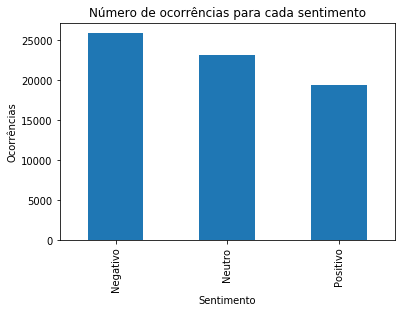

In [100]:
series = df['labels'].value_counts()
ax = series.plot(kind='bar', title='Número de ocorrências para cada sentimento')
ax.set_xlabel('Sentimento')
ax.set_ylabel('Ocorrências')
plt.show()

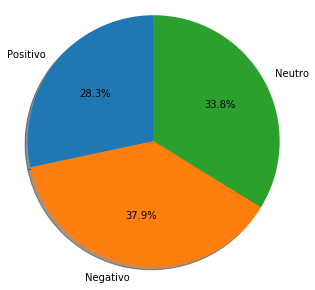

In [101]:
# Declarando uma figura com tamanho customizado 
fig = plt.figure(figsize=(5, 5))

# labels para três classes
labels = 'Positivo', 'Negativo', 'Neutro'

# Sizes for each slide
sizes = [((df['labels']=='Positivo')==True).sum(), ((df['labels']=='Negativo')==True).sum(),
        ((df['labels']=='Neutro')==True).sum()]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

# **5. Análise dos dados coletados Twitter via Twint**

**Observação:** O arquivo "teste.json" é uma amostra de dados coletados do Twitter via "Twint". Nessa amostra é possível verificar quais colunas existem e quais serão os pré-processamentos que deverão ser utilizados.

In [12]:
df_tweets = pd.read_json(prefix_path + "teste.json", lines=True)

In [13]:
df_tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1350976002697134084,1350976002697134080,2021-01-17 22:19:13-03:00,2021-01-17,22:19:13,-300,454273694,asvezesmanu,succubus,,...,,,,,,[],,,,
1,1350975998544769028,1350974963516370944,2021-01-17 22:19:12-03:00,2021-01-17,22:19:12,-300,1296432351141154818,inessss944,C Ines,,...,,,,,,"[{'screen_name': 'linaasj', 'name': 'aj', 'id'...",,,,
2,1350975974540791816,1350975974540791808,2021-01-17 22:19:06-03:00,2021-01-17,22:19:06,-300,786363761888288768,bellelopesx,dory DE UNA VEZ,,...,,,,,,[],,,,
3,1350975952067686400,1350975952067686400,2021-01-17 22:19:01-03:00,2021-01-17,22:19:01,-300,52817395,gigamonster011,GigaMon$ter011,,...,,,,,,[],,,,
4,1350975917229809666,1350975115463421952,2021-01-17 22:18:53-03:00,2021-01-17,22:18:53,-300,1119794401180553217,https__selene,"⁖ฺ۟̇࣪·֗٬̤⃟ᴀʟᴇxɪᴀ,,💕",,...,,,,,,"[{'screen_name': 'ludweeb', 'name': 'lud ⌕; 𝖼𝖾...",,,,


In [14]:
# Exibindo as colunas existentes no dataframe
df_tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [15]:
# Criando uma lista com as colunas que não serão utilizadas no projeto
list_column_drop = ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
                   'user_id', 'username', 'name', 'place', 'language', 'mentions',
                   'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
                   'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
                   'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
                   'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
                   'trans_dest']

In [17]:
# excluindo as colunas desnecessárias para o projeto
df_tweets.drop(list_column_drop, axis=1, inplace=True)

In [11]:
df_tweets.head()

,tweet
0,Fiz um teste de temperamento e confirmei que s...
1,@linaasj Faut que je teste alors je t’en dirai...
2,"fiz o teste e fiquei bem triste, não recomendo"
3,Fazer role e ter junto o @_andrematos é um tes...
4,"@ludweeb Amiga eu faço mais as decorações, ess..."


**Aplicando lowercase nos textos do dataframe e exibindo uma amostra aleatória**

In [82]:
# Aplicando o lowercase para cada tweet do dataset
dataset_tas['text'] = [entry.lower() for entry in dataset_tas['text']]

# Verificando um registro aleatório após o lowercasing
print(dataset_tas['text'][random.randint(0, 60270)])

ja devia estar a dormir porque amanha acordo cedo para ir a setubal e a alfragide, but nao ha sono


# **6. Conclusão**

Como foi apresentado no índice "Introdução", este notebook tem como objetivo apresentar como a coleta, processamento, análise e por fim a geração da base de dados utilizada futuramente.